In [ ]:
#import Required Libraries

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/Rekha/Documents/Traffic_Sign_DeepLearning')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
# Store data, labels in the list
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()



In [4]:
cur_path

'C:\\Users\\Rekha\\Documents\\Traffic_Sign_DeepLearning'

In [5]:
# Preprocess the images


In [6]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [7]:
#Converting lists into numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

In [9]:
# Save Labels & Data for future use

In [11]:
 #os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [12]:
# Load data & Labels

In [13]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [14]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [17]:
#Convert labels to onehot encoding

In [18]:

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
# Model Building

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [23]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 39s 40ms/step - loss: 1.9253 - accuracy: 0.5186 - val_loss: 0.6309 - val_accuracy: 0.8604
Epoch 2/20
981/981 [==============================] - 48s 49ms/step - loss: 0.7610 - accuracy: 0.7830 - val_loss: 0.2597 - val_accuracy: 0.9332
Epoch 3/20
981/981 [==============================] - 48s 49ms/step - loss: 0.5093 - accuracy: 0.8533 - val_loss: 0.2822 - val_accuracy: 0.9248
Epoch 4/20
981/981 [==============================] - 52s 53ms/step - loss: 0.4156 - accuracy: 0.8811 - val_loss: 0.1637 - val_accuracy: 0.9586
Epoch 5/20
981/981 [==============================] - 52s 53ms/step - loss: 0.3274 - accuracy: 0.9056 - val_loss: 0.1473 - val_accuracy: 0.9637
Epoch 6/20
981/981 [==============================] - 54s 55ms/step - loss: 0.3278 - accuracy: 0.9052 - val_loss: 0.0947 - val_accuracy: 0.9718
Epoch 7/20
981/981 [==============================] - 57s 58ms/step - loss: 0.3070 - accuracy: 0.9106 - val_loss: 0.0933 - val_accuracy:

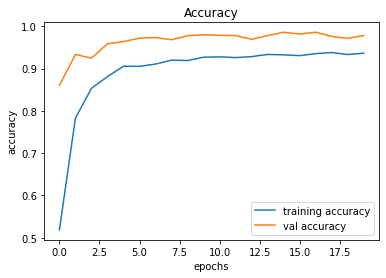

In [24]:
# # accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

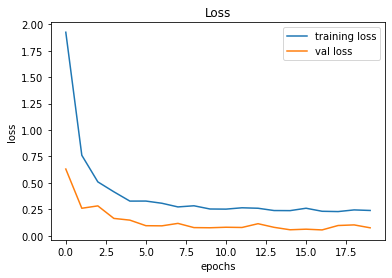

In [25]:
 # Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [26]:
# testing on the test data

In [27]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [28]:
X_test, label = testing('Test.csv')

In [29]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [30]:
# Accuracy with test Data

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9463974663499604


In [32]:
# Save the model

In [33]:
model.save("./training/TSR.h5")

In [34]:
# Load the model

In [35]:
import os
os.chdir(r'C:/Users/Rekha/Documents/Traffic_Sign_DeepLearning')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [36]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (70km/h)


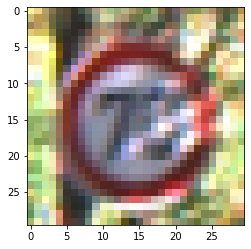

In [40]:
plot,prediction = test_on_img(r'C:/Users/Rekha/Documents/Traffic_Sign_DeepLearning\Test\00014.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()